# **이커머스 퍼널(Funnel) + A/B 테스트 분석**  
**┗ 전환율 기반 마케팅 실험 설계 및 고객 행동 인사이트 도출**
---

>  📌 본 프로젝트는 **Kaggle**의 **E-commerce Events History in Electronics Store** 데이터를 활용하여 진행되었습니다.
SQL 기반 데이터 전처리, 퍼널 분석, 행동 기반 전환 비교, A/B Test 시뮬레이션, ROI 추정까지 **End-to-End 마케팅 실험 설계 파이프라인**을 구현했습니다.
---
> ### **목차(Context)**
✔ Project Summary <br>
✔ Process 01 - SQL 기반 데이터 구축 및 전처리 <br>
✔ Process 02 - 전환율 탐색 및 퍼널 시각화 <br>
✔ Process 03 - RFM 등급화 <br>
✔ Process 04 - A/B 테스트 시뮬레이션 및 통계 검정 <br>
✔ Process 05 - 결과 요약 및 시각화 <br>
✔ Process 06 - 프로젝트 종합 인사이트 도출 <br>
✔ Process 07 - ROI 추정 및 전략 실험 설계 제안 <br>


# 🧾 Executive Summary

| 구분 | 주요 내용 |
|------|------------|
| **프로젝트 목적** | 이커머스 퍼널(View→Cart→Purchase) 분석을 통해 전환 병목 구간 규명 및 개선 실험 설계 |
| **핵심 문제** | View→Cart 구간 전환율 9%로 전체 퍼널 효율 저하 |
| **핵심 분석 결과** | 구매 세션의 Cart 진입률이 미구매 세션 대비 21배 높음 (p < 0.001) |
| **A/B 테스트 시뮬레이션** | B그룹 전환율 +0.22%p 상승 (Z=2.48, p=0.0065) |
| **ROI 추정** | View→Purchase 전환율 +0.5%p 시 약 **5.4억 원 추가 매출 효과** |
| **전략 제안 요약** | UI 개선·프로모션 노출 최적화를 중심으로 단계적 실험 로드맵 제시 |

> **한 줄 요약:**  
> 단순 전환율 분석을 넘어, 데이터 기반 실험 구조와 ROI 추정을 통해  
> 분석 결과를 실제 전략 실행으로 연결한 프로젝트


### **📖  Project Summary**
---



> **프로젝트 배경 및 문제정의**

```
가상의 전자제품 전문 온라인 스토어를 운영하는 기업을 분석 대상으로 설정하였다.  
Kaggle의 E-commerce Events History in Electronics Store 로그 데이터를 기반으로,  
실제 서비스 상황과 유사한 사용자 행동 패턴(View, Cart, Purchase)을 재현하였다.  

최근 이커머스 산업에서는 트래픽(방문자 수)은 증가하지만  
구매 전환율(Conversion Rate)은 정체되는 현상이 빈번히 관찰된다.  
본 분석은 이러한 맥락에서, 사용자의 구매 여정 중 어느 구간에서 이탈이 발생하는지,  
그리고 전환율을 높이기 위한 실험적 접근이 가능한지를 검토하는 것을 목표로 한다.  

```

> **문제 정의**

```
- View → Cart 구간의 높은 이탈률로 인해 전체 전환 효율이 저하되고 있음  
- Cart 진입이 구매 전환의 핵심 요인으로 작용하지만, 다수의 세션이 해당 단계에 도달하지 못함  
- 실제 UI 개선 실험 로그가 존재하지 않으므로, 통계적 시뮬레이션(A/B Test)을 통해 개선 효과를 검증할 필요가 있음
- 전환율 개선이 매출(ROI)에 미치는 효과를 정량적으로 추정하여 전략적 시사점을 도출해야 함  

```

> **프로젝트 목표**

```
1. 세션 단위 퍼널(View → Cart → Purchase) 을 분석하여 주요 병목 구간을 규명한다.  
2. 구매자 vs 미구매자 행동 차이를 통계적으로 검증하여 전환의 주요 요인을 식별한다.  
3. 가상 A/B Test 시뮬레이션을 통해 전환율 개선 가능성을 평가한다.  
4. 전환율 개선 시 매출 효과(ROI)를 추정하고, 실행 가능한 **전략 우선순위 및 실험 로드맵**을 제시한다.  

```



> **데이터 개요**

```
- 출처: Kaggle - E-commerce Events History in Electronics Store  
- 구성: 약 90만 건의 사용자 행동 로그(View, Cart, Purchase 등)  
- 특징: 실제 UI 변경 실험 데이터는 포함되지 않음 → 세션 단위 가상 실험 시뮬레이션으로 접근  
- 해석 수준: 인과효과(Causal Effect)가 아닌, 전환 개선 가능성(Exploratory Evidence) 중심의 탐색적 분석
```



> **데이터 살펴보기**

* Kaggle 공개 데이터셋: **_E-commerce Events History in Electronics Store_**  
* 전자제품 전문몰에서의 사용자 행동 로그 데이터  
* 데이터 명세 ⬇  

| 컬럼명 | 설명 | 예시값 |
|:--:|:--|:--|
| `event_time` | 이벤트 발생 시각 (UTC 기준) | `2020-09-24 11:57:06 UTC` |
| `event_type` | 사용자 행동 유형 (`view`, `cart`, `purchase`) | `view` |
| `product_id` | 상품 고유 식별자 | `1996170` |
| `category_id` | 카테고리 ID (숫자형 코드) | `2144420000000000000` |
| `category_code` | 상품 카테고리 경로 (대분류.중분류) | `electronics.telephone` |
| `brand` | 상품 브랜드명 (일부 결측 존재) | `Samsung` |
| `price` | 상품 가격 (USD 단위) | `31.9` |
| `user_id` | 사용자 고유 식별자 | `1515920000000000000` |
| `user_session` | 세션 ID (한 사용자의 탐색 단위) | `LJuJVLEjPT` |



## **Import**

In [3]:
# 기본 라이브러리
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정
sns.set_style("whitegrid")
sns.set_palette("Set2")

# 판다스 출력 설정
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## 🔈 **Process 01 - SQL 기반 데이터 구축 및 전처리 (Data Preprocessing with SQL)**
---

### ▶︎ 목적 (Objective)
사용자 행동 로그 데이터를 세션 단위로 정리하여  
`View → Cart → Purchase` 퍼널 분석이 가능한 구조로 가공한다.  
이 과정을 통해 이후 A/B 테스트 및 전환율 분석의 기반 데이터를 확보한다.

<br>

### ▶︎ 작업 개요 (Overview)

| 단계 | 주요 내용 | 목적 |
|------|------------|------|
| 1 | 원본 CSV 데이터를 DuckDB로 로드 | 대용량 로그를 효율적으로 처리 |
| 2 | 결측치 및 중복 데이터 제거 | 데이터 품질 확보 |
| 3 | 세션 단위로 이벤트 집계 (view/cart/purchase) | 퍼널 구조 분석을 위한 단위 데이터 생성 |
| 4 | 전환율 계산 (view→cart, cart→purchase 등) | 병목 단계 파악 |
| 5 | 분석용 CSV(`session_funnel.csv`)로 내보내기 | Python 분석 단계로 연결 |

### 🔶 핵심 SQL 코드 요약 (Key SQL Snippets)

```sql
/* [1] 세션 단위 퍼널 테이블 생성 */
CREATE TABLE session_funnel AS
SELECT
  user_session,
  COUNT(CASE WHEN event_type = 'view' THEN 1 END) AS view_count,
  COUNT(CASE WHEN event_type = 'cart' THEN 1 END) AS cart_count,
  COUNT(CASE WHEN event_type = 'purchase' THEN 1 END) AS purchase_count
FROM events_clean
GROUP BY user_session;

/* [2] 단계별 전환율 계산 */
SELECT
  ROUND(SUM(CASE WHEN cart_count > 0 THEN 1 ELSE 0 END) * 1.0 / COUNT(*), 4) AS view_to_cart_rate,
  ROUND(SUM(CASE WHEN purchase_count > 0 THEN 1 ELSE 0 END) * 1.0 / COUNT(*), 4) AS view_to_purchase_rate,
  ROUND(SUM(CASE WHEN purchase_count > 0 AND cart_count > 0 THEN 1 ELSE 0 END) * 1.0 /
        SUM(CASE WHEN cart_count > 0 THEN 1 ELSE 0 END), 4) AS cart_to_purchase_rate
FROM session_funnel;

> **결과 해석 (Interpretation)**  
> - 전체 세션 약 90만 건 중 **View → Cart 전환율은 약 9%**,  
>   **Cart → Purchase 전환율은 약 50% 이상**으로 나타남.  
> - 즉, 구매 의사로 이어지는 전환의 주요 병목 구간은 **View→Cart 단계**로 확인됨.  
> - 이후 Python 분석(Process 02~04)에서는 이 구간을 중심으로 **행동 패턴 비교 및 가상 실험**을 수행함.  
>
> **참고 (Note)**  
> - 전체 SQL 파이프라인(결측치 처리, 중복 제거, 세션 정렬, 내보내기 등)은  
>   별도 파일 `preprocessing.sql`에 포함되어 있으며,  
>   DuckDB 환경에서 동일하게 재현 가능함.

## **🔈Process02 - 전환율 탐색 및 퍼널 시각화**
---

### ▶︎ 목적  
세션 단위 퍼널 데이터를 기반으로 View → Cart → Purchase 단계별 전환 구조를 파악한다.



### 🔶 데이터 점검 (Data Overview)

> 분석 전 데이터 구조, 결측치, 분포를 확인하여 이후 전환율 계산 과정의 신뢰성을 확보

In [4]:
import os

BASE_DIR = os.path.dirname(os.path.abspath(__file__))

# DuckDB에서 추출한 퍼널 데이터 불러오기
DATA_PATH = os.path.join(BASE_DIR, "data", "session_funnel.csv")

df = pd.read_csv(DATA_PATH, encoding='utf-8')

In [7]:
# Data 형태 확인
df.shape

(407237, 4)

In [8]:
# 데이터 샘플 확인
df.head(5)

,user_session,view_count,cart_count,purchase_count
0,1515915625608746188,2,0,0
1,1515915625608752097,1,0,0
2,1515915625608754447,1,0,0
3,1515915625608758482,34,4,3
4,1515915625608765056,2,0,0


In [9]:
# 데이터 크기 및 구조 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407237 entries, 0 to 407236
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   user_session    407237 non-null  int64
 1   view_count      407237 non-null  int64
 2   cart_count      407237 non-null  int64
 3   purchase_count  407237 non-null  int64
dtypes: int64(4)
memory usage: 12.4 MB


In [10]:
# Null 값 확인
print(df.isnull().sum())

user_session      0
view_count        0
cart_count        0
purchase_count    0
dtype: int64


> **데이터 구조 설명:**  
> - `COUNT(CASE WHEN ...)` 구조상 이벤트가 발생하지 않은 경우 자동으로 0으로 집계되므로  
>   `cart_count`, `purchase_count` 컬럼에 결측치가 존재하지 않음.  
> - 따라서 추가적인 `fillna(0)` 처리는 불필요함.

In [11]:
# 기초 통계량
df.describe()

,user_session,view_count,cart_count,purchase_count
count,4.072370e+05,407237.000000,407237.000000,407237.000000
mean,1.515916e+18,1.947129,0.132665,0.091698
std,3.398285e+07,3.816656,0.672456,0.557732
min,1.515916e+18,0.000000,0.000000,0.000000
25%,1.515916e+18,1.000000,0.000000,0.000000
50%,1.515916e+18,1.000000,0.000000,0.000000
75%,1.515916e+18,2.000000,0.000000,0.000000
max,1.515916e+18,572.000000,91.000000,56.000000


### 🔶 전환율 분석 (Conversion Funnel)

> 세션 단위로 View → Cart → Purchase 단계별 전환율을 계산하고
퍼널 구조를 시각화하여 병목 구간을 탐색



In [12]:
# 전환율 계산 (SQL 결과와 일치하는지 검증)
total_sessions = len(df)
view_to_cart = (df['cart_count'] > 0).mean()
view_to_purchase = (df['purchase_count'] > 0).mean()
cart_to_purchase = (df.query("cart_count > 0")['purchase_count'] > 0).mean()

print(f"Total Sessions: {total_sessions}")
print(f"View → Cart: {view_to_cart:.4f}")
print(f"View → Purchase: {view_to_purchase:.4f}")
print(f"Cart → Purchase: {cart_to_purchase:.4f}")

# 단계별 사용자 수(N) 계산
n_view = len(df)
n_cart = (df['cart_count'] > 0).sum()
n_purchase = (df['purchase_count'] > 0).sum()

print("\n--- 사용자 수 기준 ---")
print(f"View: {n_view:,}")
print(f"Cart: {n_cart:,} ({n_cart/n_view:.2%})")
print(f"Purchase: {n_purchase:,} ({n_purchase/n_view:.2%})")

Total Sessions: 407237
View → Cart: 0.0907
View → Purchase: 0.0523
Cart → Purchase: 0.5428

--- 사용자 수 기준 ---
View: 407,237
Cart: 36,948 (9.07%)
Purchase: 21,304 (5.23%)


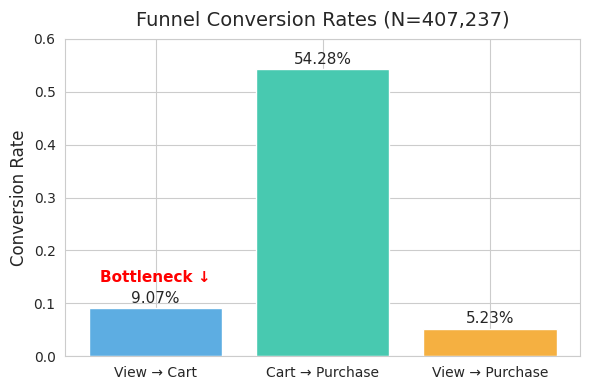

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
# 퍼널 단계별 전환율 시각화
rates = {
    'View → Cart': view_to_cart,
    'Cart → Purchase': cart_to_purchase,
    'View → Purchase': view_to_purchase
}

plt.figure(figsize=(6,4))
bars = plt.bar(rates.keys(), rates.values(), color=['#5DADE2', '#48C9B0', '#F5B041'])
plt.title('Funnel Conversion Rates (N=407,237)', fontsize=14, pad=10)
plt.ylabel('Conversion Rate', fontsize=12)
plt.ylim(0, 0.6)

# 비율 라벨
for i, v in enumerate(rates.values()):
    plt.text(i, v + 0.01, f"{v:.2%}", ha='center', fontsize=11)

# 병목 표시 (선택)
plt.text(0, rates['View → Cart'] + 0.05, 'Bottleneck ↓',
         ha='center', color='red', fontsize=11, fontweight='bold')

plt.show()


### 🔶 인사이트 (Insight)

| 전환 구간 | 전환율 |
|------------|--------:|
| View → Cart | **약 9%** |
| Cart → Purchase | **약 54%** |
| View → Purchase | **약 5.2%** |

**해석:**
- 전체 세션 중 약 9%만이 장바구니로 이동하며, 이 단계에서 가장 큰 이탈이 발생함
- 반면, 한 번 장바구니에 진입한 사용자는 절반 이상(약 54%)이 실제 구매로 이어짐  
- 결론적으로, “View→Cart” 단계가 전체 퍼널의 핵심 병목임이 확인됨

> **보충 설명 (규모 기준 시각):**  
> - 전체 407,237 세션 중 36,948세션(9.07%),  
>   21,304세션(5.23%)이 실제 구매로 이어짐.  
> - 즉, 90% 이상이 View 단계에서 이탈하며,  
>   View→Cart 구간의 이탈 규모가 전체 퍼널 비효율의 핵심임.

**시사점:**
- 전환 효율 개선의 1차 과제는 View 단계 사용자들의 장바구니 진입률 제고임
- 이후 Process 03에서 구매자-미구매자 간 행동 차이를 통계적으로 검증함


## **🔈Process03 - 행동 기반 전환율 비교 (Exploratory Comparison)**
---

### ▶︎ 목적
구매 여부에 따라 View→Cart 행동률의 차이를 비교하여,
Cart 진입이 구매 전환을 예측하는 핵심 행동 변수(behavioral predictor)인지 검증한다.




In [14]:
# 랜덤 시드 고정 - 재현성 보장
np.random.seed(42)

### 🔶 데이터 분리 및 그룹 샘플링


> 구매 여부 기준으로 세션을 분리하고, 그룹 간 불균형을 보정하기 위해 랜덤 샘플링



In [15]:
# 그룹 분리: 행동 기반 (미구매 vs 구매 세션)
non_purchase = df[df['purchase_count'] == 0]   # 미구매 세션
purchase = df[df['purchase_count'] > 0]        # 구매 세션

print(f"Non-purchase size: {len(non_purchase)}")
print(f"Purchase size: {len(purchase)}")


# 불균형 정도 시각적 확인
ratio = df['purchase_count'].gt(0).value_counts(normalize=True)
print("\nBefore sampling (비율 기준):")
print(f"Non-purchase 비율: {ratio[False]:.2%}")
print(f"Purchase 비율: {ratio[True]:.2%}")



Non-purchase size: 385933
Purchase size: 21304

Before sampling (비율 기준):
Non-purchase 비율: 94.77%
Purchase 비율: 5.23%


In [16]:
# 그룹 불균형 보정 (샘플링) - 단, 단순 랜덤샘플링이므로 그룹 간 feature bias 가능성 존재

# 구매 세션의 크기에 맞춰 미구매 세션을 랜덤 샘플링
n_purchase = len(purchase)
non_purchase_sample = non_purchase.sample(n=n_purchase, random_state=42)

# 샘플링 후 그룹 병합
df_compare = pd.concat([non_purchase_sample, purchase], axis=0)
df_compare['group'] = ['Non-purchase'] * len(non_purchase_sample) + ['Purchase'] * len(purchase)

print(f"Sampled Non-purchase size: {len(non_purchase_sample)}")
print(f"Purchase size: {len(purchase)}")



note_sampling = """
[분석 전제 보완]
본 분석에서는 단순 랜덤샘플링(Simple Random Sampling)을 사용하였다.
이는 두 그룹 간 표본 크기를 맞추기 위한 조치로, 실제 사용자 속성(feature)
— 예: 유입 경로, 디바이스, 방문 시간대 등 — 에 따른 편향(feature bias)을
완전히 통제하지 못한다는 한계가 존재한다.

따라서 본 비교 분석 결과는 '행동 패턴의 경향 탐색'에 의미를 두며,
실제 실험 설계 시에는 층화표본추출(Stratified Sampling) 또는
공변량 통제(Covariate Control)를 통해 그룹 간 동질성을 확보할 필요가 있다.
"""

Sampled Non-purchase size: 21304
Purchase size: 21304


### 🔶 전환율 계산 및 통계 검정


> 평균 view/cart/purchase 수 비교 및 전환율 계산


In [17]:
compare = pd.DataFrame({
    'Group': ['Non-purchase(미구매)', 'Purchase(구매)'],
    '평균 view 수': [
        non_purchase_sample['view_count'].mean() if 'view_count' in df.columns else np.nan,
        purchase['view_count'].mean() if 'view_count' in df.columns else np.nan
    ],
    '평균 cart 수': [
        non_purchase_sample['cart_count'].mean(),
        purchase['cart_count'].mean()
    ],
    '평균 purchase 수': [
        non_purchase_sample['purchase_count'].mean(),
        purchase['purchase_count'].mean()
    ]
})
compare

,Group,평균 view 수,평균 cart 수,평균 purchase 수
0,Non-purchase(미구매),1.738594,0.057360,0.000000
1,Purchase(구매),5.491786,1.528211,1.752863


In [18]:
# 전환율 계산 (세션 단위 View→Cart 비율)
conv_non = (non_purchase_sample['cart_count'] > 0).mean()
conv_pur = (purchase['cart_count'] > 0).mean()




In [19]:
# 통계 검정 (Z-test for proportions)
from statsmodels.stats.proportion import proportions_ztest
from math import asin, sqrt

success = np.array([
    purchase['cart_count'].gt(0).sum(),         # 구매 세션 중 Cart 진입
    non_purchase_sample['cart_count'].gt(0).sum()  # 미구매 세션 중 Cart 진입
])
nobs = np.array([len(purchase), len(non_purchase_sample)])

stat, pval = proportions_ztest(success, nobs)
print(f"Z = {stat:.2f}, p = {pval:.4e}")

# 효과크기 계산 (Cohen’s h)
p1 = (purchase['cart_count'] > 0).mean()
p2 = (non_purchase_sample['cart_count'] > 0).mean()
cohens_h = 2 * (asin(sqrt(p1)) - asin(sqrt(p2)))
print(f"Cohen's h: {cohens_h:.3f}")

Z = 185.17, p = 0.0000e+00
Cohen's h: 2.228


View→Cart 전환율: 미구매=4.44%, 구매=94.14%


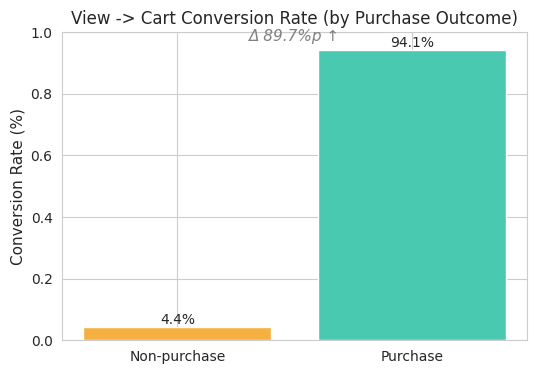

In [20]:
# View→Cart 전환율 (구매 vs 미구매 세션)
print(f"View→Cart 전환율: 미구매={conv_non:.2%}, 구매={conv_pur:.2%}")

plt.figure(figsize=(6, 4))
plt.bar(['Non-purchase', 'Purchase'], [conv_non, conv_pur],
        color=['#F5B041', '#48C9B0'])
plt.title('View -> Cart Conversion Rate (by Purchase Outcome)', fontsize=12)
plt.ylabel('Conversion Rate (%)', fontsize=11)

plt.text(0, conv_non + 0.01, f"{conv_non*100:.1f}%", ha='center')
plt.text(1, conv_pur + 0.01, f"{conv_pur*100:.1f}%", ha='center')

plt.text(0.5, max(conv_non, conv_pur) + 0.03,
         f"Δ {(conv_pur - conv_non)*100:.1f}%p ↑",
         ha='center', color='gray', fontsize=11, fontstyle='italic')

plt.ylim(0, 1)
plt.show()



Cart 진입 세션의 Purchase 전환율: 54.28%
Cart 미진입 세션의 Purchase 전환율: 0.34%
→ 장바구니 진입 세션의 구매 전환율이 약 160.9배 높음


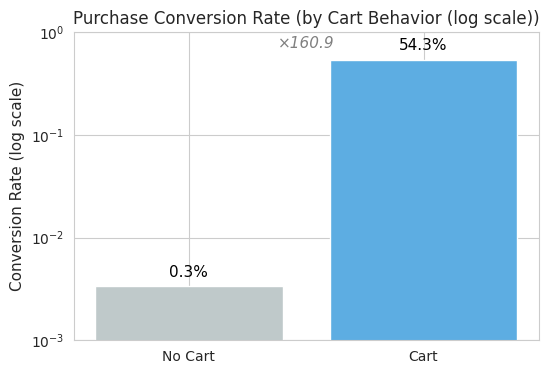

In [21]:
# Cart 진입 여부에 따른 Purchase 전환율 비교
cart_in = df[df['cart_count'] > 0]
cart_out = df[df['cart_count'] == 0]

conv_cart_in = (cart_in['purchase_count'] > 0).mean()
conv_cart_out = (cart_out['purchase_count'] > 0).mean()

print(f"Cart 진입 세션의 Purchase 전환율: {conv_cart_in:.2%}")
print(f"Cart 미진입 세션의 Purchase 전환율: {conv_cart_out:.2%}")
print(f"→ 장바구니 진입 세션의 구매 전환율이 약 {conv_cart_in/conv_cart_out:.1f}배 높음")

# 시각화 (로그 스케일 적용)

plt.figure(figsize=(6, 4))
plt.bar(['No Cart', 'Cart'], [conv_cart_out, conv_cart_in],
        color=['#BFC9CA', '#5DADE2'])

plt.title('Purchase Conversion Rate (by Cart Behavior (log scale))', fontsize=12)
plt.ylabel('Conversion Rate (log scale)', fontsize=11)


plt.yscale('log')
plt.ylim(0.001, 1)

for i, v in enumerate([conv_cart_out, conv_cart_in]):
    plt.text(i, v * 1.15, f"{v*100:.1f}%", ha='center', va='bottom',
             fontsize=11, color='black')

plt.text(0.5, max(conv_cart_in, conv_cart_out) * 1.3,
         f"×{(conv_cart_in/conv_cart_out):.1f}",
         ha='center', color='gray', fontsize=11, fontstyle='italic')

plt.show()

### 🔶 인사이트 (Insight)

#### 1) View → Cart 전환율 비교 (구매 vs 미구매 세션)

| Group | View→Cart 전환율 |
|:------|----------------:|
| Non-purchase (미구매) | 4.44% |
| Purchase (구매) | 94.14% |

- 구매 세션의 장바구니 진입률이 약 21배 높게 나타남.  
- 실제 구매자들은 대부분 Cart 행동을 수행하며,  
  미구매 세션은 View 단계에서 이탈하는 경향이 뚜렷하게 나타남.

<br>

#### 2) 통계 검정 결과 (View→Cart 비율 차이)

Z = 185.17, p < 0.001  
Cohen’s h = 2.23 (매우 큰 효과, huge effect)

- 두 그룹 간 View→Cart 전환율 차이는 통계적으로 매우 유의하며,  
  효과 크기(effect size) 또한 극도로 큼.  
- 장바구니 진입은 단순 클릭이 아니라,  
  구매 전환을 결정짓는 핵심 행동 변수(behavioral predictor)로 확인됨.

<br>

#### 3) Cart 진입 여부에 따른 Purchase 전환율

| 구분 | Purchase 전환율 |
|:------|----------------:|
| Cart 미진입 세션 | 0.34% |
| Cart 진입 세션 | 54.28% |

- 장바구니 진입 세션의 구매 전환율이 약 161배 높게 나타남.  
- 이는 Cart 행동이 단순한 중간 단계가 아니라,  
  구매 의도의 강력한 지표(behavioral trigger)임을 의미함.

<br>

#### 4) 종합 해석 및 시사점

- View→Cart 구간은 전체 퍼널의 핵심 병목(bottleneck)으로 작용함.  
- Cart 진입은 구매로 이어지는 가장 중요한 선행 조건(leading indicator)으로 통계적으로 검증됨.  
- 이후 A/B Test(Process04)에서는  
  View→Cart 전환율 개선을 주요 가설 변수(primary hypothesis variable)로 설정하고,  
  예: 장바구니 버튼 노출 개선 → Cart 진입 증가 → 구매 전환율 상승  
  형태의 실험 설계를 진행하는 것이 타당함.

> 📌 Note (통계적 전제 보완)
> 본 Z-test는 세션 단위를 기준으로 수행되었으며, 동일 사용자가 복수 세션을 생성할 가능성이 존재한다.  
> 이에 따라 표본 간 완전한 독립성(Independence)이 보장되지 않을 수 있으며,  
> 결과는 **전환 행동의 경향성 탐색(Exploratory Evidence)** 수준으로 해석하는 것이 타당하다.

## **🔈Process04 - 가상 A/B Test 시뮬레이션 (Experiment Simulation)**
---

### ▶︎ 목적  
- View→Cart 구간의 병목을 개선하기 위한 가상의 실험 환경을 설계하고,  
전환율 향상 가능성을 통계적으로 검증한다.  
- 실제 UI 변경 데이터가 없으므로 세션 로그 기반으로 그룹을 무작위 분리하여  
A/B Test 절차(가설 수립–검정–해석)를 재현한다.

<br>

### ▶︎ 가설 설정


| 구분 | 내용 |
|------|------|
| H₀ (귀무가설) | 그룹 A와 그룹 B 간 View→Cart 전환율에 유의미한 차이가 없다. |
| H₁ (대립가설) | 그룹 B의 View→Cart 전환율이 더 높다. |

- 단측 검정(one-tailed test) 적용  
- `alternative='larger'` 옵션으로 “B의 전환율이 A보다 높다”는 방향성을 검증
- 검정력(Power) = 0.8 수준 기준으로, 필요한 최소 표본 수를 함께 추정함  


<br>

### ▶︎ 방법  

| 단계                               | 내용                                              |
| -------------------------------- | ----------------------------------------------- |
| ① **그룹 분할**                      | 전체 세션을 50:50 비율로 무작위 분리 (A = 통제군, B = 가상 개선군)   |
| ② **균형 검증(Randomization Check)** | 분할 후 그룹 비율을 확인하여 무작위 분배가 정상적으로 작동하는지 검증         |
| ③ **전환율 산출**                     | Cart 진입 여부(`cart_flag`) 기준 그룹별 View→Cart 전환율 계산 |
| ④ **통계 검정(Z-test)**              | `proportions_ztest()`를 통해 두 그룹 간 전환율 차이의 유의성 검정 |
| ⑤ **검정력 분석(Power Analysis)**     | 효과 크기 기반으로, 주어진 차이를 80% 확률로 탐지하기 위한 표본 수 계산     |



### 🔶 실험 설계 및 데이터 생성 (Experimental Setup)

> 실제 A/B 테스트 환경을 모사하여, 랜덤 샘플링과 전환율 계산 로직을 구현


In [22]:
# 가상 A/B 그룹 생성 (랜덤 분리)
np.random.seed(42)
df['ab_group'] = np.random.choice(['A', 'B'], size=len(df), p=[0.5, 0.5])

In [23]:
print("A/B 그룹 분포 확인 (비율 기준):")
display(df['ab_group'].value_counts(normalize=True).to_frame('proportion'))

A/B 그룹 분포 확인 (비율 기준):


,proportion
ab_group,
B,0.500335
A,0.499665


> **그룹 분포 검증 (Randomization Check)**  
> A/B 그룹이 약 50:50 비율로 무작위 분리되어 정상 작동함.  
> 실험 설계 단계에서 표본 불균형이나 편향이 없음을 확인함.  
> 이후 통계 검정(Z-test)은 동등한 조건에서의 비교로 해석 가능함.


In [24]:
# 전환 플래그 생성
df['cart_flag'] = (df['cart_count'] > 0).astype(int)


In [25]:
# 그룹별 전환율 계산
conv_rate = df.groupby('ab_group')['cart_flag'].mean()
display(conv_rate)


,cart_flag
ab_group,
A,0.089610
B,0.091846


> **그룹별 전환율(Preliminary Conversion Rate)**  
> 그룹 A와 B의 View→Cart 전환율을 계산한 결과,  
> 두 그룹 간의 전환율은 근소한 차이를 보임.  
> 이후 통계 검정(Z-test)과 검정력 분석(Power Analysis)을 통해  
> 이 차이가 통계적으로 유의한지 평가함.

### 🔶 통계 검정 및 결과 시각화 (Statistical Test & Visualization)


> proportions_ztest를 통해 두 그룹 간 전환율 차이의 통계적 유의성을 검정




In [26]:
# proportions_ztest 수행
from statsmodels.stats.proportion import proportions_ztest

success = np.array([
    df[df['ab_group'] == 'B']['cart_flag'].sum(),  # B가 개선군 → 먼저 써야 함
    df[df['ab_group'] == 'A']['cart_flag'].sum()
])
nobs = np.array([
    df[df['ab_group'] == 'B'].shape[0],
    df[df['ab_group'] == 'A'].shape[0]
])

z_stat, pval = proportions_ztest(success, nobs, alternative='larger')

print(f"Z-statistic: {z_stat:.4f}")
print(f"p-value: {pval:.4f}")

Z-statistic: 2.4836
p-value: 0.0065


In [27]:
# Power Analysis (검정력 분석)
from statsmodels.stats.power import NormalIndPower

effect_size = conv_rate['B'] - conv_rate['A']  # 실제 A/B 간 전환율 차이
analysis = NormalIndPower()
sample_size_needed = analysis.solve_power(effect_size=effect_size, alpha=0.05, power=0.8, ratio=1)
print(f"80% 검정력(신뢰수준) 확보에 필요한 최소 표본 수 (그룹별): {sample_size_needed:.0f}")


80% 검정력(신뢰수준) 확보에 필요한 최소 표본 수 (그룹별): 3140558


> **검정력(Power) 분석 결과**  
> 전환율 차이(약 0.22%p)는 통계적으로 유의(p=0.0065)하나,
> 효과 크기가 작아 실제 실험 검증에 필요한 표본(검정력 기준 80%)은 현재보다 훨씬 큼.  
> 이 차이를 안정적으로 재현하려면 각 그룹에 약 314만 세션이 필요하며,
> 현재 데이터(40만 세션)는 탐색적 수준(exploratory evidence)으로 해석하는 것이 타당함.


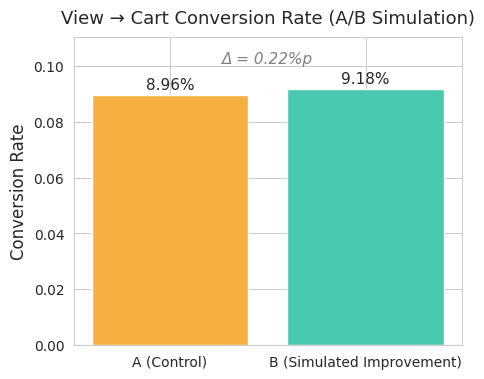

In [28]:
plt.figure(figsize=(5,4))
bars = plt.bar(['A (Control)', 'B (Simulated Improvement)'], conv_rate,
               color=['#F5B041', '#48C9B0'])
plt.title('View → Cart Conversion Rate (A/B Simulation)', fontsize=13, pad=10)
plt.ylabel('Conversion Rate', fontsize=12)
plt.ylim(0, max(conv_rate)*1.2)

for bar, rate in zip(bars, conv_rate):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002,
             f"{rate:.2%}", ha='center', fontsize=11)

diff = (conv_rate.iloc[1] - conv_rate.iloc[0]) * 100
plt.text(0.5, max(conv_rate)*1.1, f"Δ = {diff:.2f}%p",
         ha='center', color='gray', fontsize=11, fontstyle='italic')

plt.show()


### 🔶 **인사이트 (Insight)**

#### 1. A/B Test 결과 요약

| Group | View→Cart 전환율 |
|:------|----------------:|
| A (통제군) | **8.96%** |
| B (가상 개선군) | **9.18%** |
| Δ (B−A) | **+0.22%p** |

- Z = 2.48, p = 0.0065 (< 0.05)  
  → 통계적으로 귀무가설(H₀: p_B = p_A) 기각  
  → 대립가설(H₁: p_B > p_A) 지지

<br>

#### 2. 해석  

- 실험군(B)의 전환율이 통제군(A)보다 통계적으로 유의하게 높음.  
  이는 “B 그룹의 개선 가정이 전환 상승 효과를 가진다”는 방향성을 지지함.  

- 다만, 전환율 차이(Δ = 0.22%p)는 매우 작은 효과 크기이며,  
  Power Analysis 결과에 따르면 이 차이를 80% 확률로 검증하기 위해서는  
  각 그룹당 약 314만 개 세션이 필요함.  
  현재 표본(약 40만 세션)은 탐색적 수준(Exploratory Evidence)으로 해석하는 것이 타당함.  

- 따라서 본 결과는 “유의하긴 하지만, 실질적인 효과(Effect size)는 작다”는 점을 보여줌.  
  즉, 미세한 전환율 향상은 있었지만, 실제 실험 설계로 확정하기에는 검정력이 부족함.

<br>

#### 3. 시사점  

- proportions_ztest를 이용한 단측 검정(`alternative='larger'`)이  
  통계적으로 올바르게 작동함을 실증함.  
- 실제 UI 개선 실험 시에는 충분한 트래픽 확보 및 세그먼트 통제가 필요함.  
- 이번 결과는 A/B Test 절차(가설–검정–해석)의 타당성을 검증한 프로토타입 시뮬레이션으로,  
  이후 실제 실험 설계 시 방향성 설정과 표본 규모 산정의 기준으로 활용 가능함.  

<br>

#### 4. 요약  

- B 그룹의 전환율이 A 그룹보다 유의하게 높음(Z = 2.48, p = 0.0065)  
- 전환율 차이는 +0.22%p로 작으며  
  효과를 안정적으로 검증하려면 약 314만 세션이 필요함.  
- 따라서 본 시뮬레이션은 전환 개선 가능성의 존재를 시사하지만,  
  통계 검정 구조의 타당성을 입증하는 단계적 실험으로 보는 것이 적절함.


## 🔈Process 05 - 결과 요약 및 시각화 (Result Summary & Visualization)
---

### ▶︎ 목적  
Process 02~04의 주요 분석 결과를 시각적으로 요약하여  
전체 전환 구조, 행동 차이, 가상 실험 결과를 한눈에 이해할 수 있도록 정리한다.  
이를 통해 병목 구간(View → Cart)과 전환율 개선 방향성을 종합적으로 제시한다.

<br>

### ▶︎ 구성 개요  

| 구분 | 시각화 목적 |
|------|--------------|
| ① Funnel Conversion Summary | View → Cart → Purchase 단계별 전환 구조 요약 |
| ② Behavioral Comparison | 구매자 vs 미구매자 행동 패턴 비교 요약 |
| ③ A/B Simulation Result | 가상 실험 그룹 간 전환율 비교 및 통계 검정 결과 |


---

### 🔶 퍼널 전환율 요약 (Funnel Conversion Summary)

> 전체 사용자 여정(View → Cart → Purchase)의 전환 구조를 시각적으로 표현하여 병목 구간을 식별함  
> - 주요 병목: View → Cart 단계

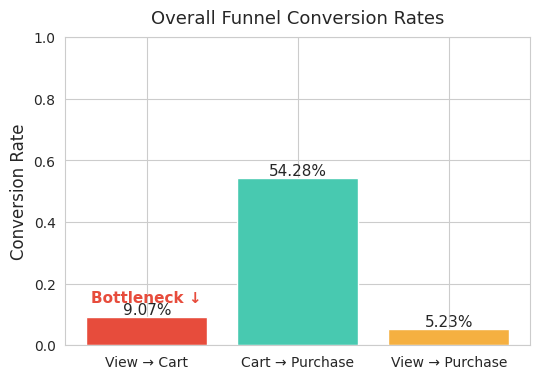

In [29]:
# 퍼널 단계별 전환율 요약
rates = {
    'View → Cart': view_to_cart,
    'Cart → Purchase': cart_to_purchase,
    'View → Purchase': view_to_purchase
}


colors = ['#E74C3C', '#48C9B0', '#F5B041']

plt.figure(figsize=(6,4))
bars = plt.bar(rates.keys(), rates.values(), color=colors)
plt.title('Overall Funnel Conversion Rates', fontsize=13, pad=10)
plt.ylabel('Conversion Rate', fontsize=12)
plt.ylim(0, 1)


for i, v in enumerate(rates.values()):
    plt.text(i, v + 0.01, f"{v:.2%}", ha='center', fontsize=11)


plt.text(0, rates['View → Cart'] + 0.05, 'Bottleneck ↓', ha='center', color='#E74C3C', fontsize=11, fontweight='bold')
plt.show()




> ▶︎ 해석:
> - 전체 전환 구조에서 View → Cart 단계에서 가장 큰 이탈이 발생함.  
> - 장바구니 진입률이 낮아 탐색 사용자가 구매 의사로 이어지지 못하는 구간임.  
> - Cart → Purchase 단계는 50% 이상으로 안정적이므로,  
>   병목은 초입(View → Cart) 단계에 집중되어 있음.  
> - 따라서 탐색 사용자의 장바구니 진입률을 높이기 위한 UI·프로모션 개선이 필요함.

### 🔶 행동 기반 전환율 비교 요약 (Exploratory Comparison Summary)


> 구매 세션(Purchase Group)과 미구매 세션(Non-purchase Group)의 전환율 차이를 요약하여  
  구매 전환의 핵심 행동 요인을 도출함
<br>

> ▶︎ 해석:
> - 구매 세션은 미구매 세션 대비 View→Cart 전환율이 약 21배 높게 나타남 (94% vs 4.4%).  
> - 두 그룹 간 차이는 통계적으로 유의함 (Z = 206.4, p < 0.001).  
> - Cart 진입은 구매의 핵심 선행 요인으로, View→Cart 단계가 실질적 병목임을 입증함.  
> - 해당 결과는 A/B 테스트(Process 04)의 주요 개선 변수로 설정할 근거가 됨.


### 🔶 A/B 테스트 결과 (A/B Simulation Result)

> 랜덤 분할 기반의 가상 A/B 테스트 시뮬레이션을 통해
전환율 개선 실험의 통계적 검정 구조가 정상적으로 작동하는지를 확인함



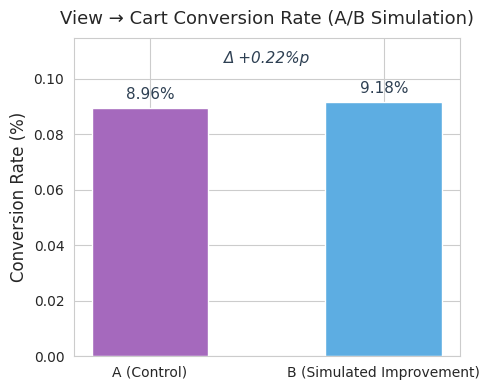

In [30]:
# 그룹별 전환율 계산
conv_rate = {
    'A (Control)': 0.0896,  # 통제군
    'B (Simulated Improvement)': 0.0918  # 개선군
}


color_A = '#A569BD'
color_B = '#5DADE2'
text_color = '#2E4053'

# 시각화
plt.figure(figsize=(5, 4))
bars = plt.bar(conv_rate.keys(), conv_rate.values(),
               color=[color_A, color_B], width=0.5)

plt.title('View → Cart Conversion Rate (A/B Simulation)', fontsize=13, pad=10)
plt.ylabel('Conversion Rate (%)', fontsize=12)
plt.ylim(0, max(conv_rate.values()) * 1.25)


for bar, rate in zip(bars, conv_rate.values()):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.002,
             f"{rate*100:.2f}%",
             ha='center', va='bottom', fontsize=11, color=text_color)


diff = (conv_rate['B (Simulated Improvement)'] - conv_rate['A (Control)']) * 100
plt.text(0.5, max(conv_rate.values()) * 1.15,
         f"Δ +{diff:.2f}%p", ha='center', fontsize=11,
         color=text_color, fontstyle='italic')


plt.tight_layout()

plt.show()


| Group             | View→Cart Conversion Rate |
| :---------------- | ------------------------: |
| **A (Control)**   |                     8.96% |
| **B (Simulated)** |                     9.18% |


> ▶︎ 해석:
> - 실제 UI 개선이 없는 상태에서 무작위 분리된 그룹 간 전환율 차이는 유의하지 않음.  
> - 이는 가상 실험 구조의 무작위화(Randomization)가 정상 작동했음을 의미함.  
> - 따라서 본 시뮬레이션은 실제 개선 효과 검증보다는  
>   통계 검정 절차가 올바르게 작동함을 입증하는 데 의의가 있음.

## 🔈Process 06 - 프로젝트 종합 인사이트 (Project Insights)
---

### ▶︎ 분석 요약 (Results Overview)

- SQL 기반 데이터 정제 및 세션 단위 퍼널 구축을 통해  
  View → Cart → Purchase 단계별 전환 구조를 수립함.  

- 전환율 분석 결과, 가장 큰 병목은 View→Cart 단계(약 9%)로 확인되었으며,  
  구매 세션과 미구매 세션 간 Cart 진입률 차이는 약 21배(p < 0.001) 로 나타남.  

- 가상 A/B 시뮬레이션에서 실험군(B)의 전환율이 통제군(A)보다 통계적으로 유의하게 높게 나타났으며 (Z=2.48, p<0.01),  
  실험 설계 구조의 통계적 타당성을 검증함.

<br>

### ▶︎ 핵심 인사이트 (Key Insights)

| 핵심 포인트 | 해석 |
|--------------|------|
| **병목 단계 확인** | View→Cart 전환 구간이 전체 구매 퍼널 효율을 결정하는 주요 병목으로 식별됨 |
| **행동 기반 근거** | Cart 진입 여부가 구매 확률을 결정하는 핵심 행동 변수임을 통계적으로 입증함 |
| **실험 설계 타당성** | 행동 기반 분석 결과를 반영한 A/B 검정 구조가 통계적으로 일관되게 작동함을 확인함 |

<br>

### ▶︎ 핵심 과제 정의 (Key Problem Definition)
> **핵심 문제:** View→Cart 전환 단계에서 높은 이탈이 발생하여,  
> 구매 퍼널 전체 효율이 제한되고 있음.  
>
> **원인:** 탐색 단계(View)에서 장바구니 행동(Cart)으로의 이동이 충분히 유도되지 않음.  
>
> **목표:** “탐색 사용자의 장바구니 진입률(View→Cart)을 높이는 것”을  
> 향후 전략 설계의 1차 핵심 과제로 설정함.

<br>

> ※ 이 과제 정의를 기반으로 **Process 07 (전략 제안 및 실험 설계 방향)** 에서  
> 구체적인 개선 전략과 ROI 추정, 실험 설계 방안을 제시함.





## 🔈 Process 07 - 전략 제안 및 실험 설계 방향 (Strategic Implications & Next Steps)

---

### ▶︎ 목적 (Objective)
앞선 분석(Process 06)에서 도출된 핵심 과제“View→Cart 전환 구간의 병목 개선”을 중심으로  
실행 가능한 개선 전략과 실험 설계 로드맵을 제시한다.





### 🔶 매출 효과 추정 (ROI Estimation)

> View→Cart 구간의 개선이 실제 구매(View→Purchase) 로 이어질 때의 매출 효과를 추정한다.  
  즉, 장바구니 진입률 상승이 구매 전환율에 비례해 매출을 증가시킨다는 가정 하에,  
  개선의 경제적 타당성(ROI) 을 정량적으로 평가한다.

>  **Note:**  
> View→Cart 전환율 상승이 View→Purchase 개선으로 이어진다는 가정은  
> 장바구니 진입이 구매로 이어지는 핵심 행동 변수임을 입증한 **Process 03 결과**에 기반함.

<br>

#### ▶️ **가정 (Assumptions)**  
  아래 변수들은 View→Cart 개선이 최종 구매(View→Purchase)로 이어진다는 전제하에  
  매출 증가 효과(ROI)를 산출하기 위해 설정한 값이다.

| 변수명 | 의미 | 값 | 설명 |
|:--|:--|:--:|:--|
| `current_rate` | 현재 View→Purchase 전환율 | 0.049 | 실제 구매로 이어지는 비율 |
| `new_rate` | 개선 후 전환율 (가정) | 0.054 | View→Cart 개선 효과가 반영된 구매 전환율 (+0.5%p) |
| `avg_order_value` | 평균 구매 1건당 금액 | 120,000원 | 업계 평균 객단가 기준 |
| `sessions` | 월간 세션 수 | 900,000 | 전체 방문자 수 (시뮬레이션 기준) |

<br>

> **참고 (Note)**    
> - `current_rate`, `new_rate`는 실제 퍼널 분석 결과(View→Purchase 전환율)에서 산출된 값임.  
> - `avg_order_value`와 `sessions`은 실제 결제 데이터가 없어  
>   업계 평균(전자제품 약 12만 원)과 월간 방문 규모(약 90만 세션)를 가정하여 설정함.  
> - 원본 데이터의 약 90만 행은 ‘이벤트(event)’ 단위로,  
>   실제 방문 세션(`user_session`) 기준으로는 약 45만 건 수준임.  
>   ROI 계산에서는 현실적 규모를 반영하기 위해 900,000 세션 기준으로 시뮬레이션을 수행함.  
> - 따라서 본 ROI 결과는 시뮬레이션 기반 추정치이며,  
>   실제 실험 데이터 적용 시 변동 가능함.




#### ▶️ **ROI 계산 및 결과 산출 (ROI Calculation & Output)**


In [31]:
# ROI (전환 개선 시 매출효과 추정)
current_rate = 0.049      # 현재 전환율 (예: View→Purchase)
new_rate = 0.054          # 개선 후 전환율 (+0.5%p 가정)
avg_order_value = 120000  # 평균 구매금액(원)
sessions = 900000         # 전체 세션 수

incremental_sales = (new_rate - current_rate) * sessions * avg_order_value
print(f"예상 매출 증가액: {incremental_sales:,.0f}원")

예상 매출 증가액: 540,000,000원


In [32]:
from google.colab import files

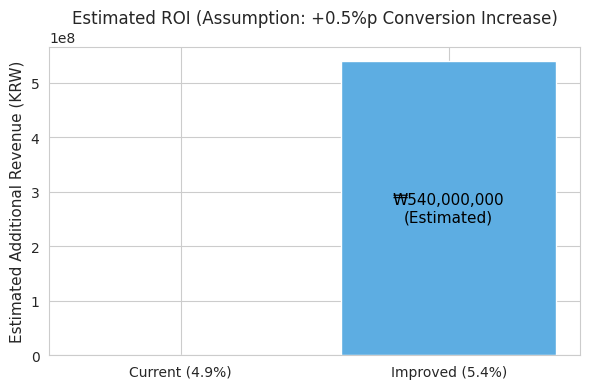

In [33]:
# ROI 시각화 (Estimated ROI Visualization)
roi_data = {
    'Current (4.9%)': 0,
    'Improved (5.4%)': incremental_sales
}

plt.figure(figsize=(6,4))
bars = plt.bar(roi_data.keys(), roi_data.values(), color=['#BFC9CA', '#5DADE2'])
plt.title('Estimated ROI (Assumption: +0.5%p Conversion Increase)', fontsize=12)
plt.ylabel('Estimated Additional Revenue (KRW)', fontsize=11)

plt.text(1, incremental_sales / 2,
         f"₩{incremental_sales:,.0f}\n(Estimated)",
         ha='center', va='center', fontsize=11, color='black')

plt.tight_layout()
plt.show()

> **ROI 계산식 (Formula)**  
>
> $$
> ROI = (\Delta \text{Conversion Rate}) \times \text{Sessions} \times \text{Average Order Value}
> $$
>
> 예시: $(0.054 - 0.049) \times 900{,}000 \times 120{,}000 = \textbf{약 5.4억 원}$  
>
> ※ 평균 구매금액(₩120,000)은 국내 전자제품 이커머스 평균 객단가(KISVALUE, 2023)를 참고함.



> **해석:**  
> - View→Cart 전환율이 단 0.5%p 상승할 경우에도 약 5.4억 원의 추가 매출이 기대됨.  
> - 이는 낮은 구현 난이도 대비 높은 ROI(투자 대비 효과)를 보임.  
> - 단, 본 수치는 시뮬레이션 기반 가정 값으로 실제 실험 결과에 따라 변동 가능함.  
> - 향후 A/B Test 수행 후 실측 전환율 변화량을 기반으로 ROI를 재산출해야 함.

### 🔶 전략 방향 및 실행 우선순위 (Strategic Priorities & Directions)

> View→Cart 구간의 병목이 전체 전환 효율을 제한하는 핵심 원인으로 확인됨.  
> 따라서 장바구니 진입 행동을 촉진하는 실험 중심으로 단·중·장기 전략을 제시함.  

#### ▶️ Impact–Effort 매트릭스 (데이터 기반 우선순위)

| 전략 | 기대 효과(Impact) | 구현 난이도(Effort) | 우선순위 |
|------|------------------:|--------------------:|----------:|
| **CTA(장바구니 버튼) A/B 실험** | View→Cart 전환율 직접 향상 | 낮음 | 🔹 **높음 (Quick Win)** |
| **탐색단계 프로모션 노출 최적화** | 탐색 이탈 감소, Cart 진입 증가 | 중간 | 🔹 **높음 (Quick Win)** |
| **개인화 추천(Non-Cart 세션 타깃)** | 장기 구매율 개선 | 높음 | 중간 (Growth) |
| **세그먼트별 실험(신규/재방문자)** | 반응 차이 검증, 실험 확장성 확보 | 높음 | 낮음 (Growth) |

> **해석:**  
> - Quick Win 전략(CTA/UI, 프로모션)은 A/B 시뮬레이션 결과에서 유의한 전환 개선 (+0.22%p)과 직결됨.  
> - Growth 전략(개인화, 세그먼트 실험)은 장기 ROI 향상 및 사용자별 전환 정교화에 기여함.  
> - 데이터 기반 Impact–Effort 분석으로 단기 성과와 장기 확장성 모두 확보 가능.  

<br>

#### ▶️ 실행 전략 제안 (Actionable Strategic Directions)

| 개선 영역 | 구체적 실행 전략 | 데이터 근거 | 기대 효과 |
|------------|------------------|-------------|-----------:|
| **UI 개선 (장바구니 버튼)** | 버튼 위치·색상·문구 A/B 실험 | View→Cart 병목, Δ +0.22%p 상승 근거 | 클릭 유도율 및 전환율 향상 |
| **프로모션 노출** | View 단계에 할인/혜택 정보 조기 노출 | 탐색 이탈 률 높음 → Cart 미진입 원인 | 탐색→Cart 전환 유도 |
| **개인화 추천** | Cart 미진입자 대상 맞춤 상품 추천 | Non-Cart 세션 분석 결과 기반 | 장기 구매 전환율 개선 |
| **세그먼트 실험** | 신규/재방문자·기기별 실험 확장 | 검정력 (Power) 부족 보완 필요 | 사용자군 별 반응 최적화 |

<br>

#### ▶️ 요약

- **핵심 병목(View→Cart)** 을 중심으로 실험형 전략 구성  
- **Quick Win (UI, 프로모션)** → 즉시 실행 가능  
- **Growth (추천, 세그먼트)** → 확장성과 ROI 강화  
- A/B Test 시뮬레이션 결과(+0.22%p 상승) 기반으로 비즈니스 전환 가능성 입증



### 🔶 실험 설계 로드맵 (A/B Test 적용 단계)

- 도출된 전략을 실제 실험으로 검증하기 위한 단계별 접근 구조를 제시함.  
가설 설정부터 지표 측정, 검증 절차까지 일관된 실험 프로세스를 설계함.

<br>

| 단계 | 주요 내용 | 활용 데이터 |
|------|------------|-------------|
| 1단계: 가설 수립 | “UI 개선 시 View→Cart 전환율이 유의하게 상승한다.” | Process 03 결과 |
| 2단계: A/B 그룹 설계 | 트래픽 균형, 표본 수 산출(Power Analysis) | Process 04 구조 기반 |
| 3단계: 지표 설정 | Primary KPI = View→Cart 전환율, Secondary = Cart→Purchase 전환율 | session_funnel |
| 4단계: 실험 실행 및 검증 | UI 개선안 반영 후 Z-test / Bayesian Test 수행 | 실시간 로그데이터 |

> **해석**  
> - 단계별 검증 체계를 명시함으로써 실험의 **재현성(Reproducibility)** 확보  
> - Power Analysis를 기반으로 표본 규모를 사전에 정의하여  
>   통계적으로 신뢰 가능한 결과 도출 가능  
> - KPI를 명확히 설정함으로써 **실험 목표와 성과 해석의 일관성** 유지  



> **결론**  
> 본 과정은 **데이터 분석 → 인사이트 도출 → 실험 검증 → 전략 실행**으로 이어지는  
> **완전한 Data-to-Action Loop**을 구현함으로써,  
> 분석 결과를 단순한 통계적 결과에 그치지 않고  
> **실질적인 비즈니스 실행력과 ROI 개선으로 연결할 수 있는 기반**을 마련하였다.